In [20]:
## Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [21]:
## Data Sources:
# https://laurencemoroney.com/datasets.html

In [37]:
## Load data
train_path=r"C:\Users\JokeRR\Referances\python_projects\Rock_Paper_Scissor Classification\rps-test-set"
valid_path=r"C:\Users\JokeRR\Referances\python_projects\Rock_Paper_Scissor Classification\rps-test-set"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255)
train=train_gen.flow_from_directory(directory=train_path,target_size=(150,150),batch_size=45)

valid_gen=ImageDataGenerator(rescale=1./255)
valid=valid_gen.flow_from_directory(directory=valid_path,target_size=(150,150),batch_size=45)

Found 372 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [38]:
## Class Mapper
labels=(train.class_indices)
labels

{'paper': 0, 'rock': 1, 'scissors': 2}

In [39]:
## Inception Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

weight=r"C:\Users\JokeRR\Referances\Deep_Learning\Tf & Keras\pretrained model & weight\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

inception_v3=InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)
# include_top=False: Not include fully-connected layer at top
# weights=None: Random initialization
inception_v3.load_weights(weight)        
    

#inception_v3.summary()

In [49]:
for layer in inception_v3.layers:
    layer.trainable=False            # No trainable parameters

    
## Changing 'mixed7'layer to 'last_layer'    
last_layer=inception_v3.get_layer('mixed7')
#print('last layer output shape: ',last_layer.output_shape)
last_output=last_layer.output   


## modify model's layer
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Flatten,Dropout

x=Flatten()(last_output)           # Flatten output layer to 1 dimension
x=Dense(512,activation='relu')(x)  # Add fully connected layer with 512 hidden units
x=Dense(256,activation='relu')(x)  # Add fully connected layer with 256 hidden units
x=Dense(128,activation='relu')(x)  # Add fully connected layer with 128 hidden units
x=Dropout(0.4)(x)                  # Add dropout rate of 0.4
x=Dense(3,activation='softmax')(x) # Add final sigmoid layer for classification
          
model=Model(inception_v3.input,x)   

#model.summary()  


In [50]:
## Model Compile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


## Early Stpping
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

## Model Training
history=model.fit(x=train,steps_per_epoch=len(train),validation_data=valid,epochs=5,verbose=1,callbacks=[callback])

Epoch 1/5
9/9 [==============================] - 24s 3s/step - loss: 0.5130 - accuracy: 0.8118 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 2/5
9/9 [==============================] - 22s 2s/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/5
9/9 [==============================] - 23s 3s/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 5.6202e-04 - val_accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 21s 2s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.3487e-04 - val_accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 21s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.3500e-04 - val_accuracy: 1.0000


Text(0.5, 1.0, 'Accuracy')

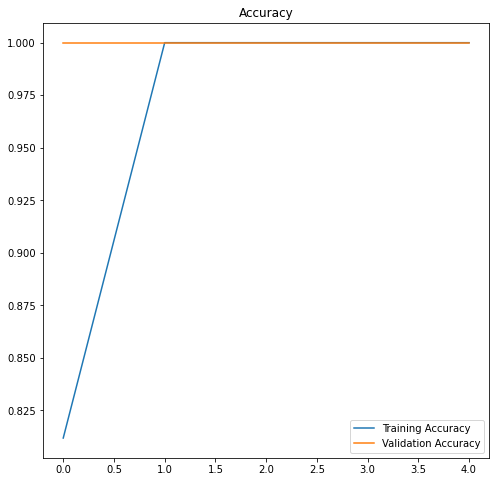

In [51]:
## Plotting Score & Loss Curve

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


## Plotting Accuracy Score
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
#plt.subplot(1,2,1)
plt.plot(range(5),acc,label='Training Accuracy')
plt.plot(range(5),val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Accuracy')

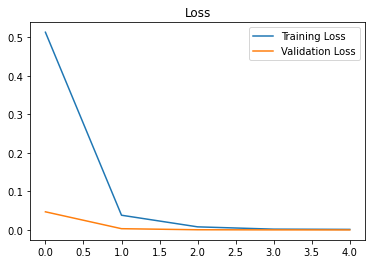

In [52]:
## Plotting Loss

#plt.subplot(1,2,2)
plt.plot(range(5),loss,label='Training Loss')
plt.plot(range(5),val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Loss')
plt.show()

In [ ]:
## Prediction
pred=model.predict(x=test,steps=len(test),verbose=1)
pred

In [ ]:
## New Image Prediction
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predictor(img_path):
    img=image.load_img(img_path,target_size=(224,224))  # Image(PIL Image Instance)
    img_arr=image.img_to_array(img)                     # to Array(3D Array)
    img_expand=np.expand_dims(img_arr,axis=0)           # Expand Image-Array
    pred=model.predict(img_expand,batch_size=10)        # model Predict
    
    lst=["Paper","Rock","Scissors"]

    return img.show(),lst[pred.argmax()]

predictor(r"C:\Users\JokeRR\Referances\python_projects\Rock_Paper_Scissor Classification\rps-validation\paper-hires2.png")